# LetGrowMore

# LGMVIP- March 2022

## Internship domain: Data Science

## Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

# Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.shape # (rows, columns)

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.describe() #b Describing the datasette

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [8]:
df.isnull().sum() # No null values found

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df.duplicated() # Nbo duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
2030    False
2031    False
2032    False
2033    False
2034    False
Length: 2035, dtype: bool

# Expolaratory data analysis

<Figure size 1440x720 with 0 Axes>

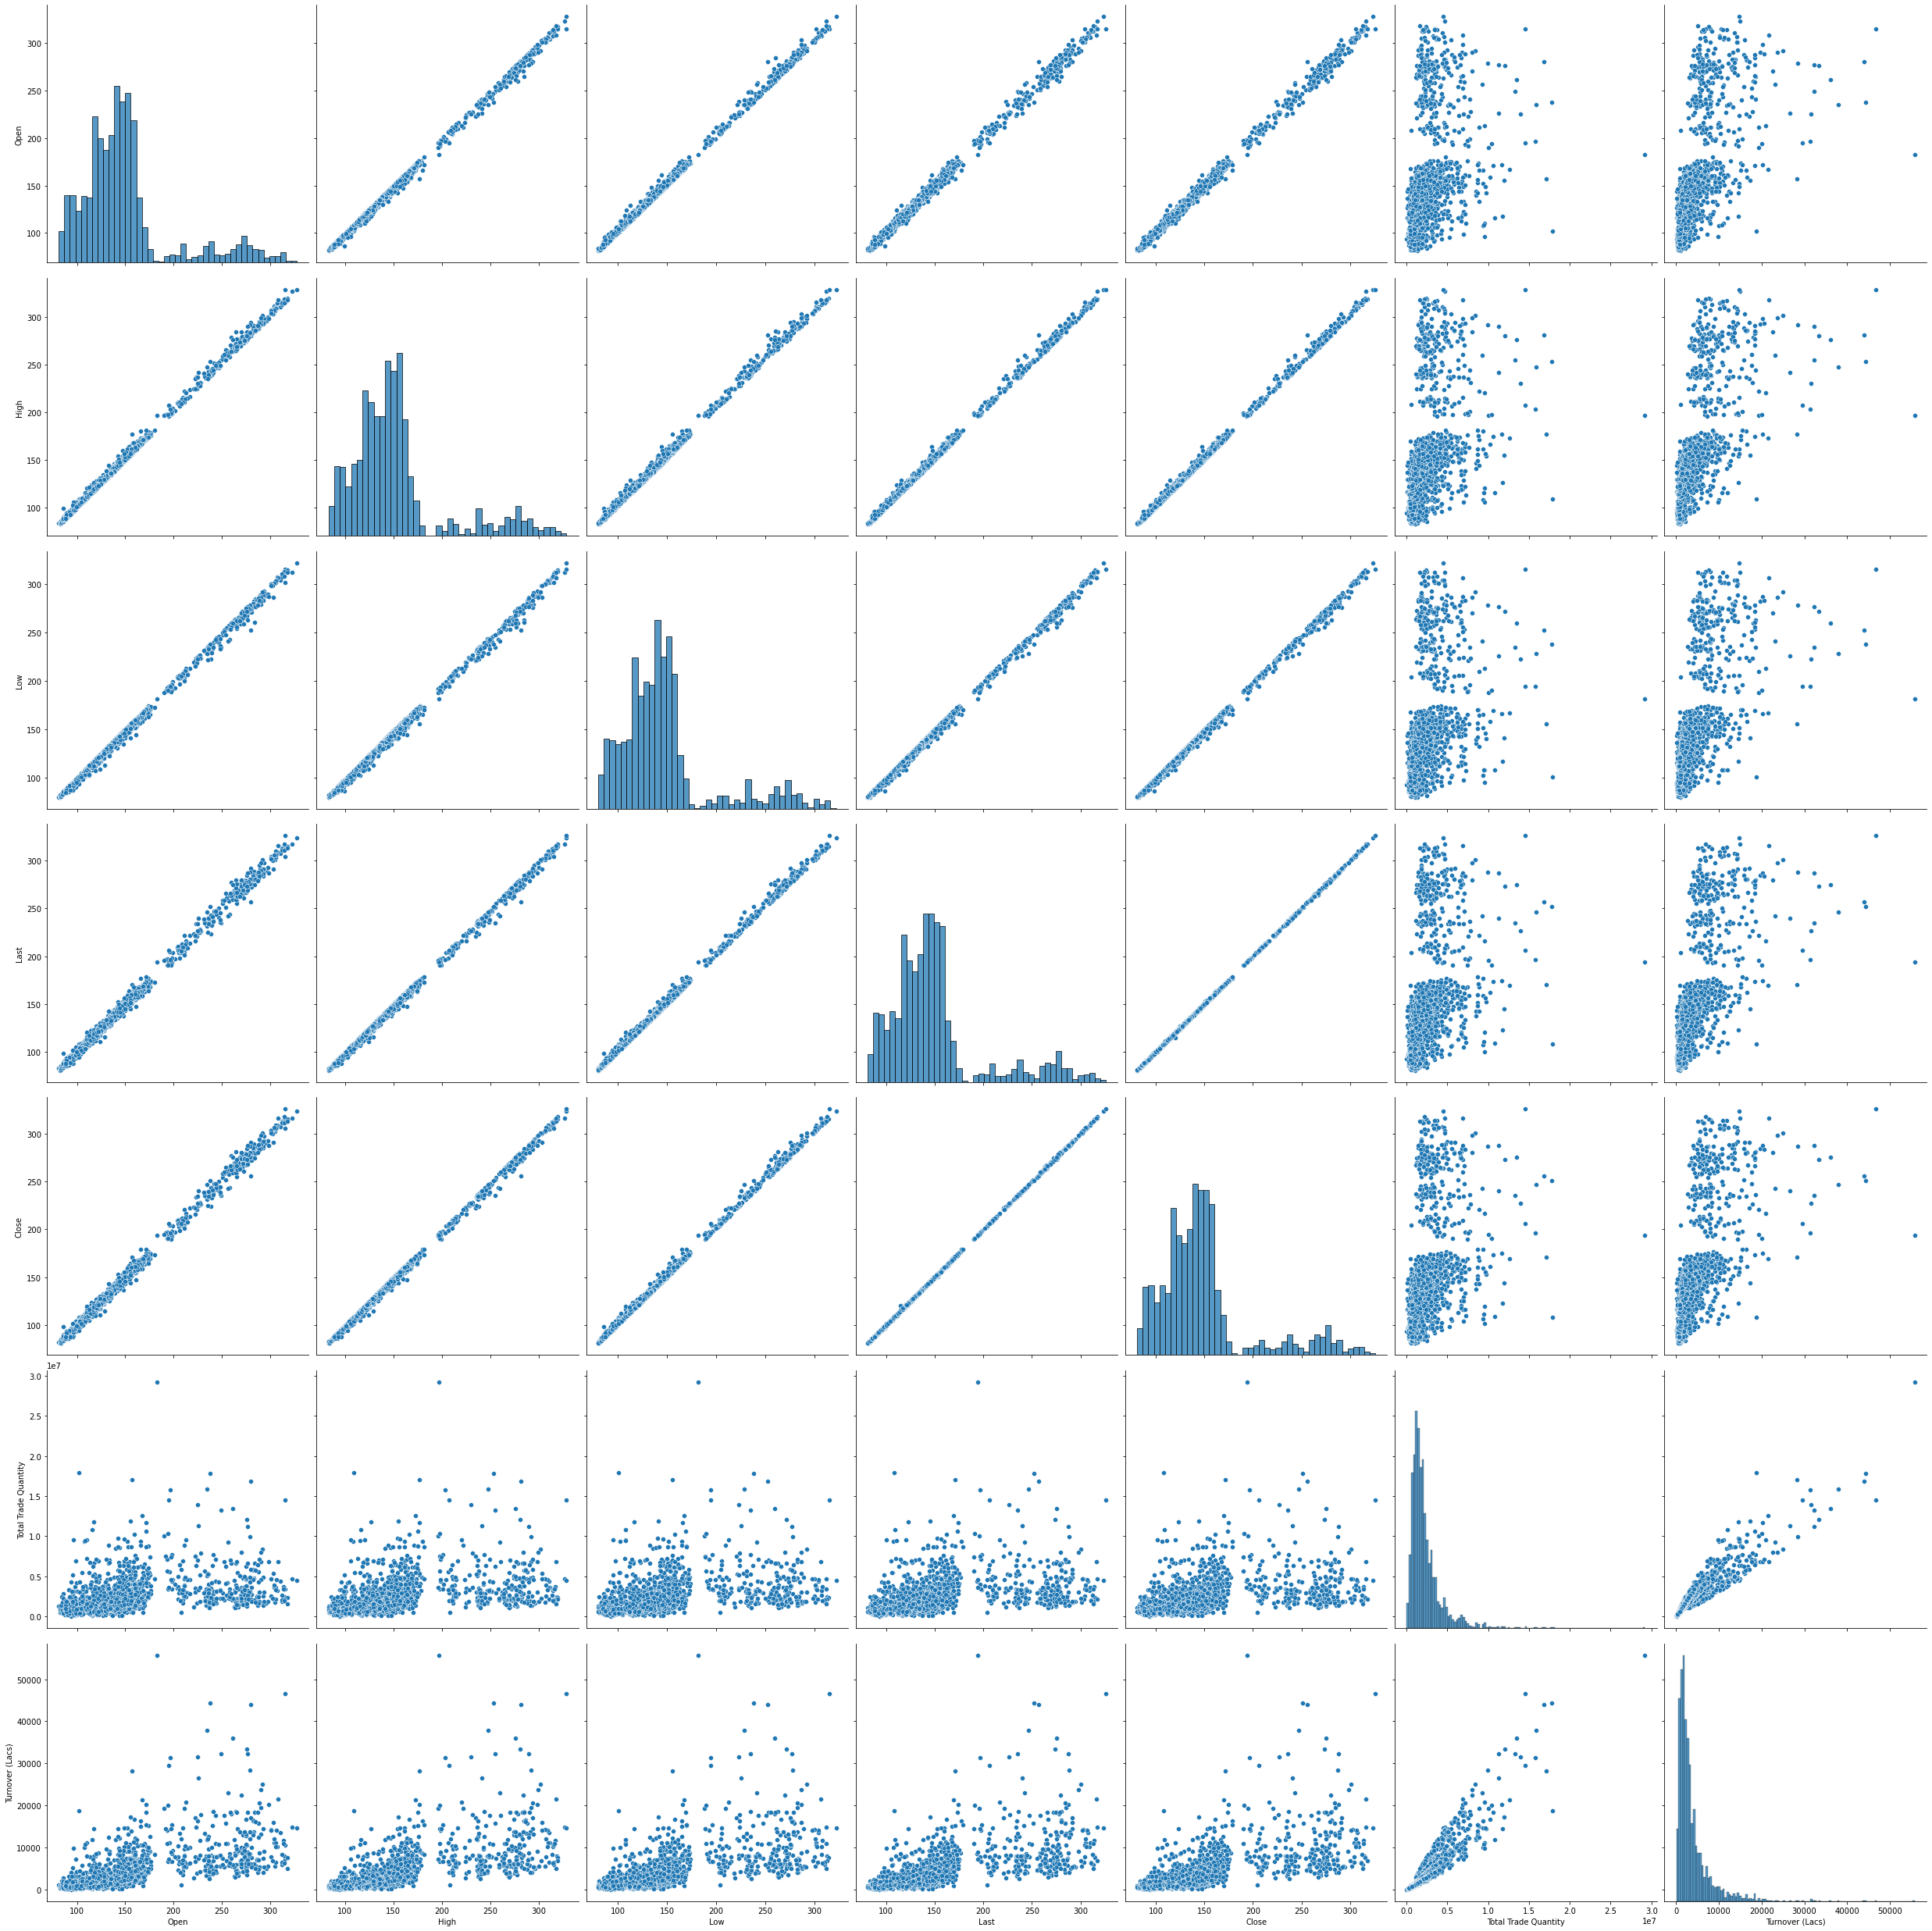

In [10]:
plt.figure(figsize=(20,10))
sns.pairplot(df,height=5)

<AxesSubplot:>

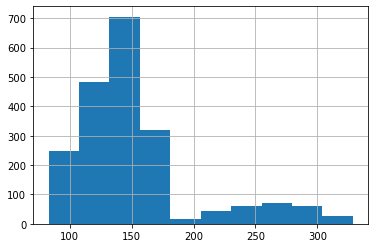

In [11]:
df['High'].hist()

# Scaling of dataset

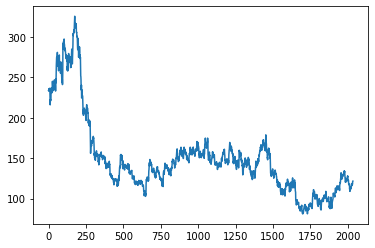

In [12]:
data_close = df.reset_index()['Close']
plt.plot(data_close)

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [14]:
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Splitting the dataset into training set and testing set


In [15]:
training_size = int(len(data_close) * 0.70)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [16]:
print(train_data.shape, test_data.shape)

(1424, 1) (611, 1)


In [17]:
# Function to convert an array of values to a dataset matrix

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

### Reshaping into x=t,t+1,t+2,t+3 and y=t+4

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)



(1323, 100) (1323,) (510, 100) (510,)


In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Building the LSTM model

In [20]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
21/21 [==============================] - 16s 418ms/step - loss: 0.0258 - val_loss: 0.0056
Epoch 2/100
21/21 [==============================] - 8s 369ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 3/100
21/21 [==============================] - 7s 337ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
21/21 [==============================] - 7s 328ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
21/21 [==============================] - 7s 333ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/100
21/21 [==============================] - 7s 349ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
21/21 [==============================] - 7s 333ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
21/21 [==============================] - 7s 346ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
21/21 [==============================] - 7s 319ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/100
21/21 [==============================] - 7s 319ms/step - loss: 0.0011 - val_l

### Predicting and examining performance metrics

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
math.sqrt(mean_squared_error(y_train, train_predict))

164.85476498350926

### Plotting and visualising predictions

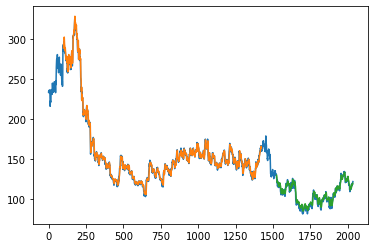

In [27]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predicting the stock price for the next 30 days

In [28]:
len(test_data), x_test.shape

x_input = test_data[409:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [29]:
lst_output=[]
n_steps=201
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.0684232  0.06781046 0.0629085  0.0692402  0.0755719  0.07781863
 0.08088235 0.08843954 0.09395425 0.09599673 0.08660131 0.09027778
 0.08517157 0.08374183 0.07945261 0.09109477 0.09129902 0.08803105
 0.09681373 0.11417484 0.10498366 0.09987745 0.08537582 0.08047386
 0.06862745 0.06576797 0.06147876 0.07169118 0.07026144 0.0747549
 0.06821895 0.0692402  0.07066993 0.06801471 0.06678922 0.07414216
 0.07169118 0.08639706 0.08312908 0.06311275 0.0629085  0.05167484
 0.03186275 0.04003268 0.03860294 0.04105392 0.03390523 0.03125
 0.02634804 0.05861928 0.06311275 0.0620915  0.05535131 0.08455882
 0.05514706 0.06045752 0.0557598  0.0439134  0.02920752 0.02818627
 0.04718137 0.06045752 0.05861928 0.06168301 0.06699346 0.07087418
 0.0755719  0.07700163 0.10375817 0.10314542 0.10334967 0.10089869
 0.10437092 0.09803922 0.09722222 0.09783497 0.09579248 0.09109477
 0.09313725 0.08558007 0.09517974 0.11172386 0.12275327 0.12806373
 0.1313317  0.12479575 0.11090686 0.10743464 0.1162173

3 day output [[0.16907366]]
4 day input [0.0755719  0.07781863 0.08088235 0.08843954 0.09395425 0.09599673
 0.08660131 0.09027778 0.08517157 0.08374183 0.07945261 0.09109477
 0.09129902 0.08803105 0.09681373 0.11417484 0.10498366 0.09987745
 0.08537582 0.08047386 0.06862745 0.06576797 0.06147876 0.07169118
 0.07026144 0.0747549  0.06821895 0.0692402  0.07066993 0.06801471
 0.06678922 0.07414216 0.07169118 0.08639706 0.08312908 0.06311275
 0.0629085  0.05167484 0.03186275 0.04003268 0.03860294 0.04105392
 0.03390523 0.03125    0.02634804 0.05861928 0.06311275 0.0620915
 0.05535131 0.08455882 0.05514706 0.06045752 0.0557598  0.0439134
 0.02920752 0.02818627 0.04718137 0.06045752 0.05861928 0.06168301
 0.06699346 0.07087418 0.0755719  0.07700163 0.10375817 0.10314542
 0.10334967 0.10089869 0.10437092 0.09803922 0.09722222 0.09783497
 0.09579248 0.09109477 0.09313725 0.08558007 0.09517974 0.11172386
 0.12275327 0.12806373 0.1313317  0.12479575 0.11090686 0.10743464
 0.11621732 0.11683007 0

7 day output [[0.17157589]]
8 day input [0.09395425 0.09599673 0.08660131 0.09027778 0.08517157 0.08374183
 0.07945261 0.09109477 0.09129902 0.08803105 0.09681373 0.11417484
 0.10498366 0.09987745 0.08537582 0.08047386 0.06862745 0.06576797
 0.06147876 0.07169118 0.07026144 0.0747549  0.06821895 0.0692402
 0.07066993 0.06801471 0.06678922 0.07414216 0.07169118 0.08639706
 0.08312908 0.06311275 0.0629085  0.05167484 0.03186275 0.04003268
 0.03860294 0.04105392 0.03390523 0.03125    0.02634804 0.05861928
 0.06311275 0.0620915  0.05535131 0.08455882 0.05514706 0.06045752
 0.0557598  0.0439134  0.02920752 0.02818627 0.04718137 0.06045752
 0.05861928 0.06168301 0.06699346 0.07087418 0.0755719  0.07700163
 0.10375817 0.10314542 0.10334967 0.10089869 0.10437092 0.09803922
 0.09722222 0.09783497 0.09579248 0.09109477 0.09313725 0.08558007
 0.09517974 0.11172386 0.12275327 0.12806373 0.1313317  0.12479575
 0.11090686 0.10743464 0.11621732 0.11683007 0.11764706 0.12888072
 0.12847222 0.13337418 

11 day output [[0.17421892]]
12 day input [0.08517157 0.08374183 0.07945261 0.09109477 0.09129902 0.08803105
 0.09681373 0.11417484 0.10498366 0.09987745 0.08537582 0.08047386
 0.06862745 0.06576797 0.06147876 0.07169118 0.07026144 0.0747549
 0.06821895 0.0692402  0.07066993 0.06801471 0.06678922 0.07414216
 0.07169118 0.08639706 0.08312908 0.06311275 0.0629085  0.05167484
 0.03186275 0.04003268 0.03860294 0.04105392 0.03390523 0.03125
 0.02634804 0.05861928 0.06311275 0.0620915  0.05535131 0.08455882
 0.05514706 0.06045752 0.0557598  0.0439134  0.02920752 0.02818627
 0.04718137 0.06045752 0.05861928 0.06168301 0.06699346 0.07087418
 0.0755719  0.07700163 0.10375817 0.10314542 0.10334967 0.10089869
 0.10437092 0.09803922 0.09722222 0.09783497 0.09579248 0.09109477
 0.09313725 0.08558007 0.09517974 0.11172386 0.12275327 0.12806373
 0.1313317  0.12479575 0.11090686 0.10743464 0.11621732 0.11683007
 0.11764706 0.12888072 0.12847222 0.13337418 0.14236111 0.14093137
 0.13970588 0.13827614 0

15 day output [[0.17691484]]
16 day input [0.09129902 0.08803105 0.09681373 0.11417484 0.10498366 0.09987745
 0.08537582 0.08047386 0.06862745 0.06576797 0.06147876 0.07169118
 0.07026144 0.0747549  0.06821895 0.0692402  0.07066993 0.06801471
 0.06678922 0.07414216 0.07169118 0.08639706 0.08312908 0.06311275
 0.0629085  0.05167484 0.03186275 0.04003268 0.03860294 0.04105392
 0.03390523 0.03125    0.02634804 0.05861928 0.06311275 0.0620915
 0.05535131 0.08455882 0.05514706 0.06045752 0.0557598  0.0439134
 0.02920752 0.02818627 0.04718137 0.06045752 0.05861928 0.06168301
 0.06699346 0.07087418 0.0755719  0.07700163 0.10375817 0.10314542
 0.10334967 0.10089869 0.10437092 0.09803922 0.09722222 0.09783497
 0.09579248 0.09109477 0.09313725 0.08558007 0.09517974 0.11172386
 0.12275327 0.12806373 0.1313317  0.12479575 0.11090686 0.10743464
 0.11621732 0.11683007 0.11764706 0.12888072 0.12847222 0.13337418
 0.14236111 0.14093137 0.13970588 0.13827614 0.13541667 0.13010621
 0.12254902 0.12479575

19 day output [[0.17944083]]
20 day input [0.10498366 0.09987745 0.08537582 0.08047386 0.06862745 0.06576797
 0.06147876 0.07169118 0.07026144 0.0747549  0.06821895 0.0692402
 0.07066993 0.06801471 0.06678922 0.07414216 0.07169118 0.08639706
 0.08312908 0.06311275 0.0629085  0.05167484 0.03186275 0.04003268
 0.03860294 0.04105392 0.03390523 0.03125    0.02634804 0.05861928
 0.06311275 0.0620915  0.05535131 0.08455882 0.05514706 0.06045752
 0.0557598  0.0439134  0.02920752 0.02818627 0.04718137 0.06045752
 0.05861928 0.06168301 0.06699346 0.07087418 0.0755719  0.07700163
 0.10375817 0.10314542 0.10334967 0.10089869 0.10437092 0.09803922
 0.09722222 0.09783497 0.09579248 0.09109477 0.09313725 0.08558007
 0.09517974 0.11172386 0.12275327 0.12806373 0.1313317  0.12479575
 0.11090686 0.10743464 0.11621732 0.11683007 0.11764706 0.12888072
 0.12847222 0.13337418 0.14236111 0.14093137 0.13970588 0.13827614
 0.13541667 0.13010621 0.12254902 0.12479575 0.13848039 0.14011438
 0.13888889 0.1354166

23 day output [[0.18182406]]
24 day input [0.06862745 0.06576797 0.06147876 0.07169118 0.07026144 0.0747549
 0.06821895 0.0692402  0.07066993 0.06801471 0.06678922 0.07414216
 0.07169118 0.08639706 0.08312908 0.06311275 0.0629085  0.05167484
 0.03186275 0.04003268 0.03860294 0.04105392 0.03390523 0.03125
 0.02634804 0.05861928 0.06311275 0.0620915  0.05535131 0.08455882
 0.05514706 0.06045752 0.0557598  0.0439134  0.02920752 0.02818627
 0.04718137 0.06045752 0.05861928 0.06168301 0.06699346 0.07087418
 0.0755719  0.07700163 0.10375817 0.10314542 0.10334967 0.10089869
 0.10437092 0.09803922 0.09722222 0.09783497 0.09579248 0.09109477
 0.09313725 0.08558007 0.09517974 0.11172386 0.12275327 0.12806373
 0.1313317  0.12479575 0.11090686 0.10743464 0.11621732 0.11683007
 0.11764706 0.12888072 0.12847222 0.13337418 0.14236111 0.14093137
 0.13970588 0.13827614 0.13541667 0.13010621 0.12254902 0.12479575
 0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.

27 day output [[0.184124]]
28 day input [0.07026144 0.0747549  0.06821895 0.0692402  0.07066993 0.06801471
 0.06678922 0.07414216 0.07169118 0.08639706 0.08312908 0.06311275
 0.0629085  0.05167484 0.03186275 0.04003268 0.03860294 0.04105392
 0.03390523 0.03125    0.02634804 0.05861928 0.06311275 0.0620915
 0.05535131 0.08455882 0.05514706 0.06045752 0.0557598  0.0439134
 0.02920752 0.02818627 0.04718137 0.06045752 0.05861928 0.06168301
 0.06699346 0.07087418 0.0755719  0.07700163 0.10375817 0.10314542
 0.10334967 0.10089869 0.10437092 0.09803922 0.09722222 0.09783497
 0.09579248 0.09109477 0.09313725 0.08558007 0.09517974 0.11172386
 0.12275327 0.12806373 0.1313317  0.12479575 0.11090686 0.10743464
 0.11621732 0.11683007 0.11764706 0.12888072 0.12847222 0.13337418
 0.14236111 0.14093137 0.13970588 0.13827614 0.13541667 0.13010621
 0.12254902 0.12479575 0.13848039 0.14011438 0.13888889 0.13541667
 0.14011438 0.1380719  0.13071895 0.13071895 0.12867647 0.11846405
 0.14644608 0.14808007 0

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [31]:
df = data_close.tolist()
df.extend(lst_output)

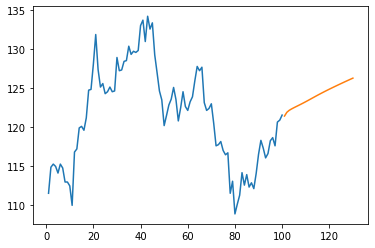

In [32]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))



# Thank You